# Clustering

by Chris North, Virginia Tech

Topics: K-means, HAC, DBSCAN

Datasets: Animal_Type.csv

## Clustering concepts
* https://en.wikipedia.org/wiki/Cluster_analysis 
* Goal: Reduce n of a big table, by aggregating similar rows into k << n clusters. Cluster centroids should approximate the full data.
    * Cluster rows based on high-dimensional distances
    * Cluster labels = ID# of each cluster
    * Cluster membership = Assign each row a cluster label, for GroupBy
    * Cluster Centroid = mean of the rows in a cluster
    * k = number of clusters
* Options:
    * How to choose k?
    * Allowable cluster sizes?
    * Required membership? Multiple membership?
    * Hierarchical clusters?  e.g. clusters of clusters?
* Common methods: K-means, HAC, DBSCAN, ...


### How would you visually cluster this 2D data?
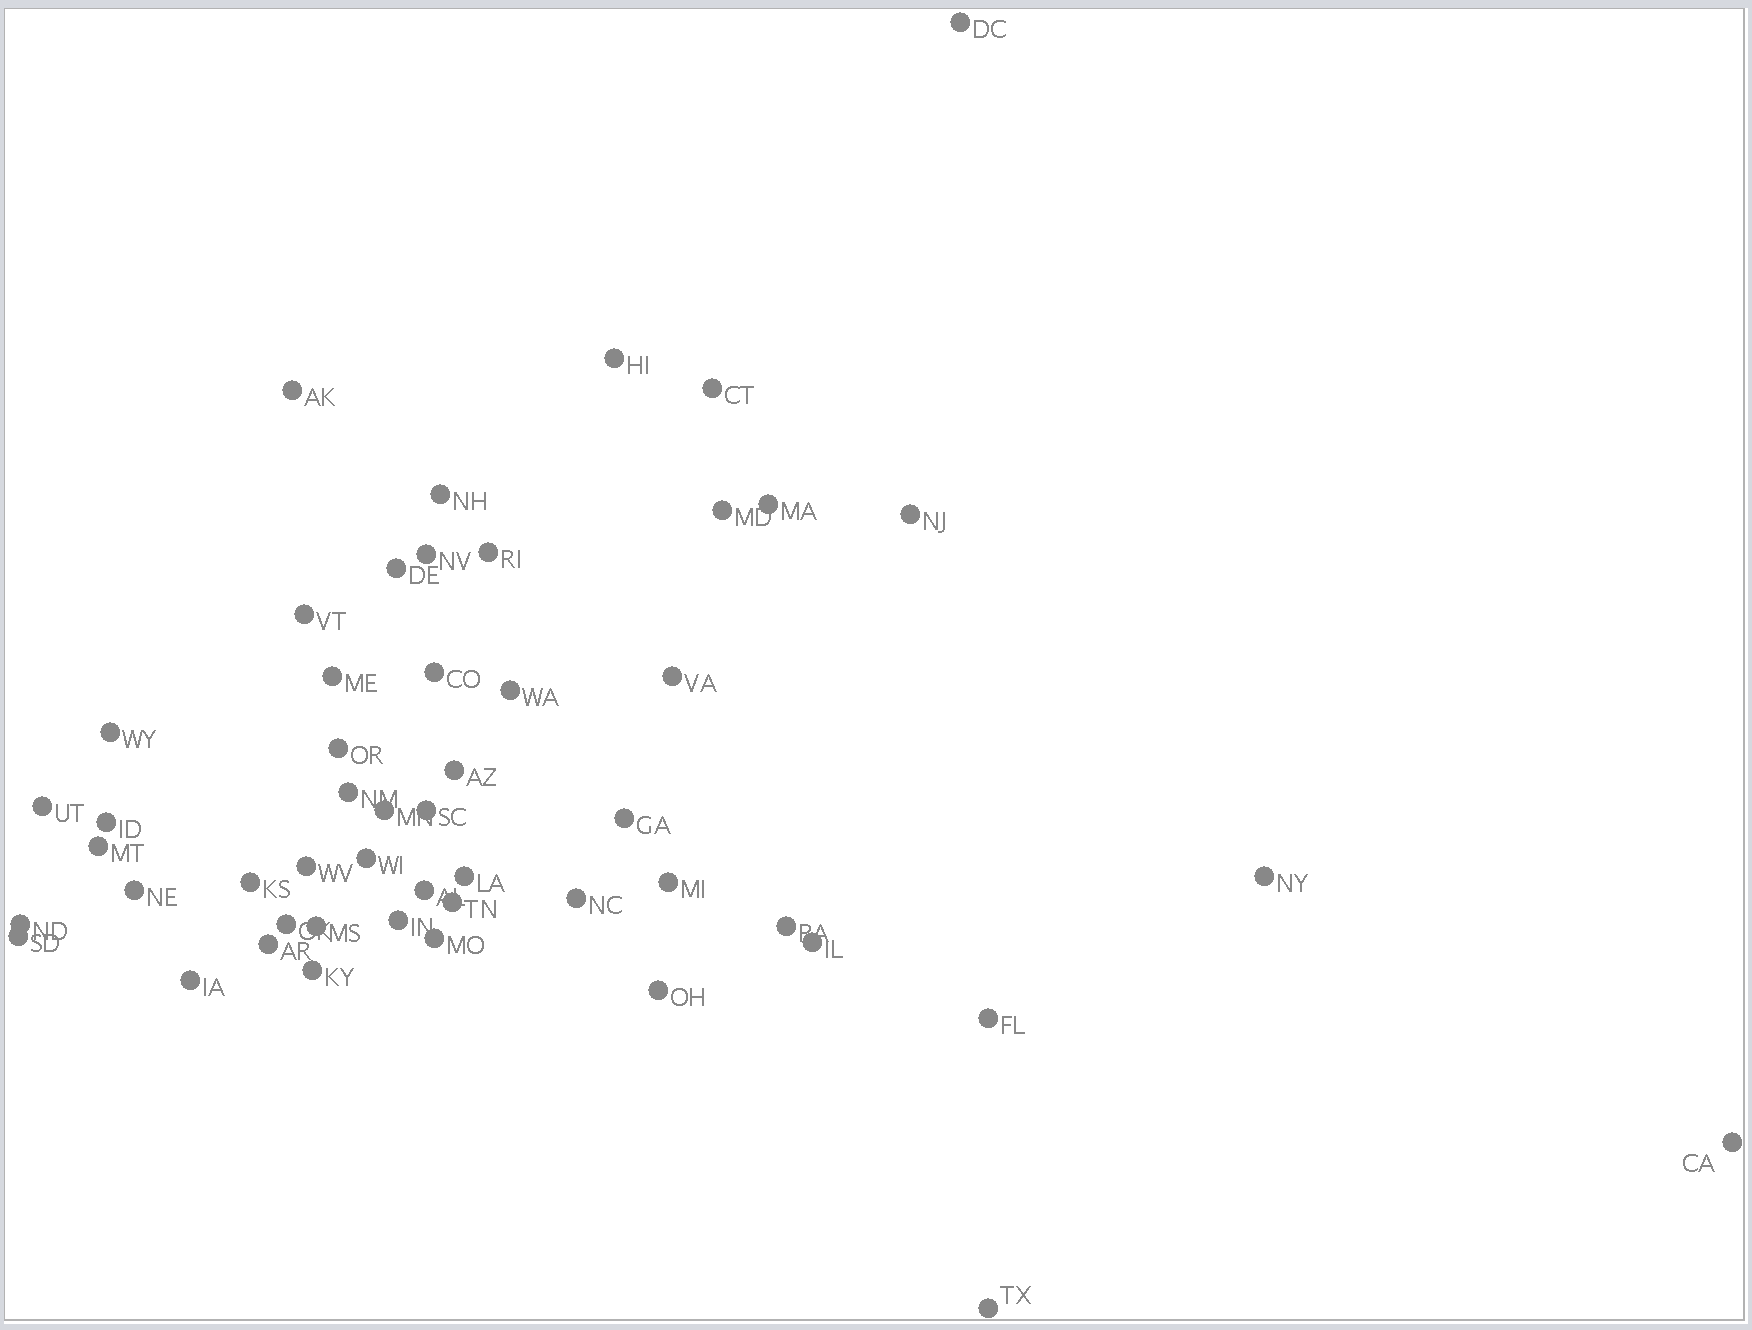


## K-means Clustering
* Goal:  Select k clusters that minimize the total within-cluster variance, i.e. rows are assigned to their nearest L2 cluster centroid.
* Given:
    * $n$ high-dimensional points $P_i$, where $i=1...n$
    * $k << n$ number of clusters desired
    * high-dimensional Euclidean distance function $||P_i - P_j||$
* Find:
    * cluster labels for each point $L_i = 1...k$
    * with cluster centroids $\mu_j$, where $j=1..k$
    * that minimize the **total within-cluster variance (WCV)**:  
        $\large \sum_{i} ||P_i - \mu_{L_i}||^2$
        * 0 (n clusters) &le; WCV &le; total variance (1 cluster)
* Typically z-score normalize the data first
* Can use resulting cluster Labels for categorical GroupBy.  
* Centroids are the means of the groups.
* Unsupervised machine learning
* https://en.wikipedia.org/wiki/K-means_clustering 
* Python reference: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 


![WCV](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/002-partitional-clustering/figures/006b-kmeans-clustering-k-means-plot-ggplot2-factoextra-1.png)


## K-means Example
Cluster the animal data

In [1]:
### K-means Clustering
import pandas
import numpy
import matplotlib.pyplot
%matplotlib inline
table = pandas.read_csv('Animal_Type.csv').set_index('Name').sort_index()
table.head()

,Type,Active,Agility,Arctic,Bipedal,Bulbous,Coastal,Domestic,Fierce,Forager,...,Size,Smart,Speed,Spots,Stalker,Strength,Tail,Timid,Toughskin,Water
Name,,,,,,,,,,,,,,,,,,,,,
Bat,Air,36.24,42.11,0.00,23.75,15.28,9.38,5.56,32.57,24.38,...,1.25,32.30,80.96,1.25,8.12,7.50,15.11,8.98,30.00,1.39
Beaver,Water,67.81,36.25,11.25,12.50,37.50,33.75,13.12,3.75,10.62,...,6.88,41.88,25.00,7.50,1.25,32.81,86.56,31.88,25.00,65.62
Blue Whale,Water,7.88,7.06,32.75,0.00,65.15,5.31,5.00,7.50,0.00,...,86.46,39.06,21.42,23.75,0.00,55.26,26.42,44.58,45.17,76.61
Bobcat,Land,61.13,71.74,6.67,0.00,0.00,1.39,3.75,71.95,36.97,...,19.93,42.89,73.97,33.55,66.98,32.99,64.50,0.00,2.50,0.00
Buffalo,Land,18.94,4.38,0.00,0.00,50.83,0.00,2.31,26.99,23.67,...,84.91,10.00,24.79,0.00,0.00,50.81,5.39,19.88,42.36,9.38


In [2]:
### normalize
quant = table.drop(columns='Type')
norm = (quant - quant.mean())/quant.std()
norm.head()

,Active,Agility,Arctic,Bipedal,Bulbous,Coastal,Domestic,Fierce,Forager,Forest,...,Size,Smart,Speed,Spots,Stalker,Strength,Tail,Timid,Toughskin,Water
Name,,,,,,,,,,,,,,,,,,,,,
Bat,-0.122237,0.321313,-0.515129,0.845275,-0.533534,-0.054466,-0.764903,0.223928,0.160911,1.494360,...,-1.214116,-0.087187,1.626449,-0.588277,-0.267344,-1.163772,-1.349291,-1.047946,0.243343,-0.506743
Beaver,1.310382,0.067700,-0.008944,0.193449,0.428509,1.742710,-0.481470,-0.953782,-0.657530,-0.172810,...,-1.049261,0.424085,-0.743989,-0.296388,-0.545909,-0.192710,1.699393,0.150570,0.014479,1.758646
Blue Whale,-1.409188,-1.195602,0.958432,-0.530802,1.625650,-0.354610,-0.785898,-0.800541,-1.289204,-0.988632,...,1.280968,0.273585,-0.895636,0.462524,-0.596594,0.668622,-0.866708,0.815250,0.937717,2.146262
Bobcat,1.007250,1.603658,-0.215017,-0.530802,-1.195100,-0.643692,-0.832762,1.833167,0.909760,0.336116,...,-0.667136,0.477987,1.330356,0.920206,2.119315,-0.185804,0.758120,-1.517933,-1.015410,-0.555768
Buffalo,-0.907295,-1.311589,-0.515129,-0.530802,1.005648,-0.746198,-0.886749,-0.004095,0.118680,-0.988632,...,1.235581,-1.277308,-0.752884,-0.646655,-0.596594,0.497890,-1.764032,-0.477473,0.809096,-0.224936


In [3]:
len(norm)

49

In [4]:
## Cluster with KMeans
import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=5)
labels = km.fit_predict(norm)
labels = pandas.DataFrame(labels, columns=['Cluster'], index=norm.index)
labels.sort_values('Cluster')

,Cluster
Name,
Elephant,0
Hippopotamus,0
Moose,0
Buffalo,0
Sheep,0
Ox,0
Rhinoceros,0
Cow,0
Giant Panda,0


In [5]:
labels.Cluster.value_counts()

4    15
3    11
0    10
2     8
1     5
Name: Cluster, dtype: int64

In [6]:
## total within-cluster variance
km.inertia_

963.2037671133821

In [7]:
## run several times to see different results

In [8]:
## cluster centroids (of normalized data)
pandas.DataFrame(km.cluster_centers_, columns=norm.columns)

,Active,Agility,Arctic,Bipedal,Bulbous,Coastal,Domestic,Fierce,Forager,Forest,...,Size,Smart,Speed,Spots,Stalker,Strength,Tail,Timid,Toughskin,Water
0,-1.241785,-1.197247,-0.356164,-0.233454,0.937457,-0.345023,-0.027228,-0.398967,-0.193410,-0.376380,...,0.802185,-0.899085,-1.353711,-0.144559,-0.525635,0.510091,-0.742413,0.429840,0.960832,-0.272303
1,0.140781,0.209048,-0.502621,-0.413299,-0.946493,-0.613162,0.193220,-0.894529,-0.443284,-0.133945,...,0.375815,0.005354,0.906846,1.604021,-0.525635,0.000428,0.346366,0.922645,-0.191132,-0.531291
2,-0.541880,-0.324242,1.816529,-0.221619,0.893240,1.742341,-0.331506,-0.235591,-0.675374,-0.850432,...,0.666640,0.348435,-0.223443,-0.060775,-0.233588,0.396554,-0.552612,0.039681,0.954310,2.015940
3,0.745082,0.965062,-0.182949,0.617886,-0.577105,-0.367616,-0.394559,1.264298,0.233476,0.719434,...,0.111781,0.796598,0.933063,-0.105588,1.324426,0.643544,0.069135,-1.106945,-0.390028,-0.485741
4,0.523539,0.193699,-0.429670,-0.041517,-0.362658,-0.225261,0.419891,-0.237349,0.465685,0.221547,...,-1.097575,-0.172399,0.035116,-0.328457,-0.321030,-1.023631,0.623514,0.196487,-0.799789,-0.360325


### Exercise

compute centroids based on original data

### Lloyd's algorithm for K-means
* Steps:
    1. Choose $k$ unique random points as initial centroids: 
        $\mu_j$ = $P_{random}$
    2. Assign each point to nearest centroid:
        $L_i = j$ where $argmin_j ||P_i - \mu_j||$
    3. Re-calculate centroids based on cluster membership:
        $\mu_j = mean(\{P_i : L_i=j\})$
    4. Goto 2, until convergence (total centroid movement below threshold)
* Heuristic optimization solution, local minima
    * can get different results depending on randomized initialization
* Assumes Euclidean distance 
* $O(npki)$ where $i$ is number of iterations, fast
* https://vis.yalongyang.com/clustering-vis/index.html

### In-class theory exercise

Compute k-means clusters by hand, using above 4 steps


In [9]:
### K-means Clustering exercise
k = 2

In [10]:
### Data
data = pandas.DataFrame([('A',0,0,numpy.nan),('B',2,2),('C',8,0),('D',8,2)], 
                        columns=['Point','X','Y','Cluster']).set_index('Point')
data

,X,Y,Cluster
Point,,,
A,0,0,NaN
B,2,2,NaN
C,8,0,NaN
D,8,2,NaN


In [11]:
### 1. Let initial k=2 random centroids be points A and B.
centroids = pandas.DataFrame([(0,0,0),(1,2,2)], 
                        columns=['Cluster','X','Y',]).set_index('Cluster')
centroids

,X,Y
Cluster,,
0,0,0
1,2,2


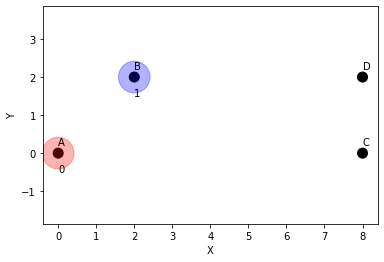

In [12]:
### visualize
ax = data.plot.scatter(x='X', y='Y', s=100, c=data.Cluster.map({None:'black',0:'red',1:'blue'}))
[ax.text(r.X, r.Y+0.2, i) for (i,r) in data.iterrows()]
centroids.plot.scatter(x='X', y='Y', s=1000, alpha=0.3, c=centroids.index.map({0:'red',1:'blue'}), ax=ax).axis('equal')
a=[ax.text(r.X, r.Y-0.5, i) for (i,r) in centroids.iterrows()]

In [13]:
### 2. Assign points to nearest centroid.
data.Cluster = [0, 0, 1, 1]
data

,X,Y,Cluster
Point,,,
A,0,0,0
B,2,2,0
C,8,0,1
D,8,2,1


In [14]:
### 3. Re-compute new centroids.
centroids.X = [ 1, 8]
centroids.Y = [ 1, 1]
centroids

,X,Y
Cluster,,
0,1,1
1,8,1


In [15]:
### 4. Goto 2, until no changes.

$\large WCV = \sum_{i} ||P_i - \mu_{L_i}||^2$

### Computational solution

In [16]:
### Run K-Means
km = sklearn.cluster.KMeans(n_clusters=2)
labels = km.fit_predict(data[['X','Y']])  # execute kmeans algorithm here
data['Cluster'] = labels
data

,X,Y,Cluster
Point,,,
A,0,0,0
B,2,2,0
C,8,0,1
D,8,2,1


In [17]:
### cluster centroids
km.cluster_centers_
pandas.DataFrame(km.cluster_centers_, columns=['X','Y'])

,X,Y
0,1.0,1.0
1,8.0,1.0


$\large WCV = \sum_{i} ||P_i - \mu_{L_i}||^2$

In [18]:
## total within-cluster variance
km.inertia_

6.0

## Elbow Method for choosing k
* Plot the within-cluster variance for $k=1...n$:  WCV(k)
    * WCV(1) == total variance (ddof=0)
    * WCV(n) == 0
* Select the $k$ at the "elbow" in the WCV curve:
    * maximum ratio of slopes of adjecent segments k-1, k, k+1
    * k where $argmax_k \frac{WCV(k)-WCV(k-1)}{WCV(k+1)-WCV(k)}$
* https://bl.ocks.org/rpgove/0060ff3b656618e9136b

![Elbow](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs13638-021-01910-w/MediaObjects/13638_2021_1910_Fig1_HTML.png)

## Exercise:  

Compute the Elbow plot

## Hierarchical Agglomerative Clustering (HAC)

* Goal: Produce a tree of clusters, called a "Dendrogram"
* Iteratively group nearest neighbors, until all points are in 1 big group
    * Distance function between points: L1, L2, ...
    * Linkage = What is the distance function between 2 clusters?
        * Single Linkage = distance between their nearest points
        * Complete Linkage = distance between their farthest points
        * Centroid Linkage = distance between their centroids (euclidean)
        * ...
        * https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage
* Python:  `scipy.cluster.hierarchy`
    * https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy


### How would you hierarchically group these?

In [19]:
###
data[['X','Y']]

,X,Y
Point,,
A,0,0
B,2,2
C,8,0
D,8,2


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.8284271247461903, 2.8284271247461903, 0.0],
  [2.0, 6.0, 6.0, 2.8284271247461903]],
 'ivl': ['C', 'D', 'A', 'B'],
 'leaves': [2, 3, 0, 1],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

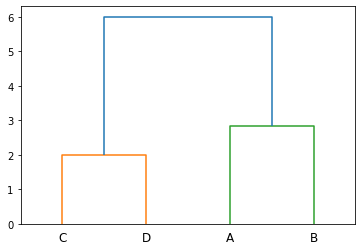

In [20]:
## Using scipy
import scipy.cluster.hierarchy
import matplotlib.pyplot

tree = scipy.cluster.hierarchy.linkage(data[['X','Y']], method='single', metric='euclidean')
scipy.cluster.hierarchy.dendrogram(tree, labels=data.index)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [35.625, 35.625, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [80.0, 80.0, 107.5, 107.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [150.0, 150.0, 165.0, 165.0],
  [130.0, 130.0, 157.5, 157.5],
  [93.75, 93.75, 143.75, 143.75],
  [47.8125, 47.8125, 118.75, 118.75],
  [175.0, 175.0, 185.0, 185.0],
  [83.28125, 83.28125, 180.0, 180.0],
  [131.640625, 131.640625, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [210.0, 210.0, 225.0, 225.0],
  [217.5, 217.5, 235.0, 235.0],
  [226.25, 226.25, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [235.625, 235.625, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [287.5, 287.5, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [320.0, 320.0, 335.0, 335.0],
  [296.25, 296.25, 327.5, 32

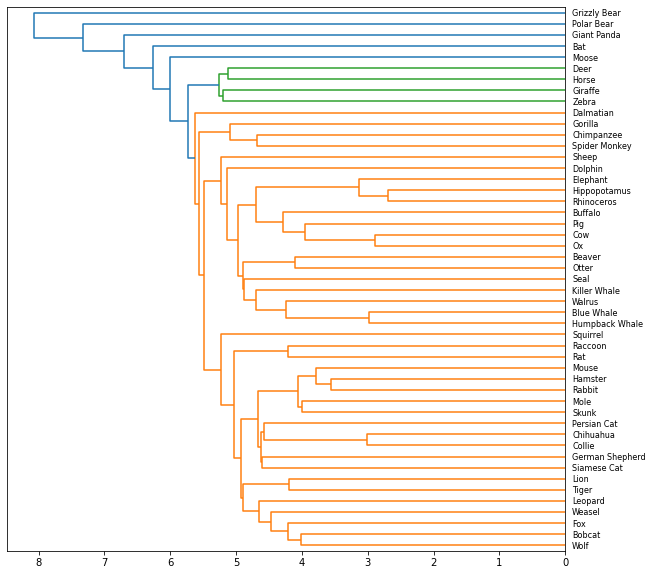

In [21]:
tree = scipy.cluster.hierarchy.linkage(norm, method='single', metric='euclidean')
matplotlib.pyplot.figure(figsize=(10,10))
scipy.cluster.hierarchy.dendrogram(tree, labels=norm.index, orientation='left', distance_sort='descending')

## Density-based Clustering (DBSCAN)

* Goal: Find densely packed groups of points, and ignore outliers
* How to define density?
    * Point has `min_samples` neighbors within a distance of `eps`
        * minsamples = minimum number of neighbors
        * eps = maximum distance to neighbors
* Linearly scan points
    * when such a point is found, recursively scan its neighbors until cluster is completed
* https://en.wikipedia.org/wiki/DBSCAN
* Python: `sklearn.cluster.DBSCAN`
    * https://scikit-learn.org/stable/modules/clustering.html#dbscan
    
![DBSCAN](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/220px-DBSCAN-density-data.svg.png)

For 1 point, look at closest neighbor, if distance < threshold, then the 2 forma  temp cluster, keep doing that until no neighbor that is close to the threshold. If cluster has too few points, are considered as outliers instead of a cluster. 
- 2 parameters: minsamples, eps. minsamples = min # of samples to be a cluster, eps = Maximum distance to neighbor.
- In K-means, everything is assigned to a cluster while DBSCAN only considers dense areas. 


In [24]:
import sklearn.cluster
# Create model first
dbscan = sklearn.cluster.DBSCAN(eps=5, min_samples=3, metric='euclidean') # Greater eps lowers outliers
labels = dbscan.fit_predict(norm) # -1 means outliers, 
labels = pandas.DataFrame(labels, index=norm.index, columns=['Cluster'])
labels.sort_values('Cluster') # Around half datapoints are outliers, there are 2 clusters

,Cluster
Name,
Bat,-1
Squirrel,-1
Spider Monkey,-1
Sheep,-1
Rat,-1
Raccoon,-1
Polar Bear,-1
Moose,-1
Horse,-1


In [23]:
## Using sklearn